In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

os.chdir('/home/bruno/datacloud')

plt.style.use('seaborn-dark')

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
from dcrhino3.feature_extraction.feature_extractor_j2 import FeatureExtractorJ2
from dcrhino3.helpers.general_helper_functions import dict_to_object

# Define Picks and Window Widths 

I copied this from a process flow

In [12]:
transformed_args = {
        "additional_pick_based_amplitude_windows": {
          "axial": {
            "multiple_1": {
              "left_upper_bound_offset": -0.002,
              "left_lower_bound_offset": -0.006,
              "right_upper_bound_offset": 0.006,
              "right_lower_bound_offset": 0.002
            },
            "primary": {
              "left_upper_bound_offset": -0.002,
              "left_lower_bound_offset": -0.006,
              "right_upper_bound_offset": 0.006,
              "right_lower_bound_offset": 0.002
            }
          },
          "tangential": {
            "multiple_1": {
              "left_upper_bound_offset": -0.002,
              "left_lower_bound_offset": -0.006,
              "right_upper_bound_offset": 0.006,
              "right_lower_bound_offset": 0.002
            },
            "primary": {
              "left_upper_bound_offset": -0.002,
              "left_lower_bound_offset": -0.006,
              "right_upper_bound_offset": 0.006,
              "right_lower_bound_offset": 0.002
            }
          }
        },
        "ACOUSTIC_VELOCITY": 4755.,
        "amplitude_half_widths": {
          "axial": {
            "multiple_3": 0.00105,
            "multiple_2": 0.00105,
            "multiple_1": 0.00105,
            "primary": 0.00105
          },
          "tangential": {
            "multiple_3": 0.00105,
            "multiple_2": 0.00105,
            "multiple_1": 0.00105,
            "primary": 0.00105
          }
        },
        "sensor_saturation_g": 1000,
        "manual_time_windows": {
          "axial": {
            "multiple_3": [-0.004, 0.005],
            "multiple_2": [-0.004, 0.005],
            "multiple_1": [-0.004, 0.005],
            "primary": [-0.004,0.005]
          },
          "tangential": {
            "multiple_3": [-0.004, 0.005],
            "multiple_2": [-0.004, 0.005],
            "multiple_1": [-0.004, 0.005],
            "primary": [-0.004,0.005]
          }
        },
        "sensor_distance_to_shocksub": 1,
        "upsample_sampling_rate": 10000,
        "SHEAR_VELOCITY": 2654.,
        "time_picks": {
          "axial": {
            "multiple_3": "maximum",
            "multiple_2": "maximum",
            "multiple_1": "maximum",
            "primary": "maximum"
          },
          "tangential": {
            "multiple_3": "maximum",
            "multiple_2": "maximum",
            "multiple_1": "maximum",
            "primary": "maximum"
          }
        },
        "amplitude_picks": {
          "axial": {
            "multiple_3": "integrated_absolute_amplitude",
            "multiple_2": "integrated_absolute_amplitude",
            "multiple_1": "integrated_absolute_amplitude",
            "primary": "integrated_absolute_amplitude"
          },
          "tangential": {
            "multiple_3": "integrated_absolute_amplitude",
            "multiple_2": "integrated_absolute_amplitude",
            "multiple_1": "integrated_absolute_amplitude",
            "primary": "integrated_absolute_amplitude"
          }
        }
      }

Here we need to convert the dictionary to dictionary object. 

In [13]:
def _dict_to_object(obj):
    for k, v in obj.items():
        if isinstance(v, dict):
            item = _dict_to_object(v)
            obj[k] = dict_to_object(v)
    return dict_to_object(obj)

In [14]:
transformed_args = _dict_to_object(transformed_args)

# Define a wavelet 

In [15]:
import numpy as np

In [16]:
from theory.core import TheoreticalWavelet, Pipe, Rock

In [17]:
pipe = Pipe()

rock = Rock(2000, 2000)

theoretical = TheoreticalWavelet(pipe, rock, )

In [18]:
wavelet = theoretical.primary_in_time_domain(500, filtered=True)
timestamp = theoretical.get_time_range_for_window(500) / 1000

In [19]:
theoretical.sampling_rate

10000

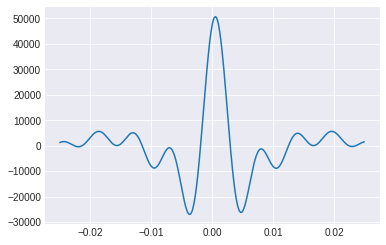

In [20]:
plt.plot(timestamp, wavelet)

# Call feature extractor 

In [22]:
fej2 = FeatureExtractorJ2('axial', trimmed_trace=wavelet, timestamp=timestamp/1000, transformed_args=transformed_args, sampling_rate=10000)

In [23]:
ef = fej2.extract_features()

Seems to work, but I think the features are not correct. Ignore everything below, lets jam tmr.

(-10, 10)

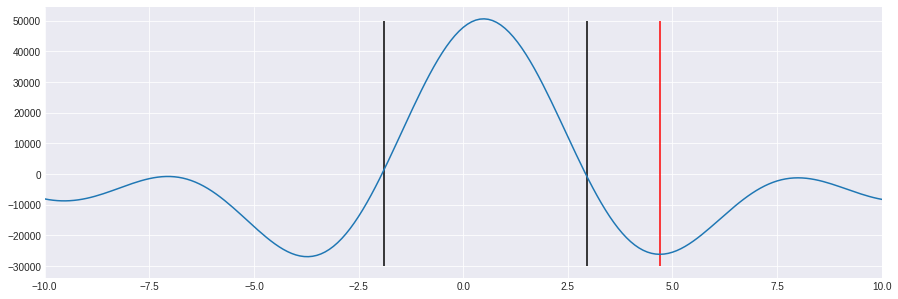

In [130]:
plt.plot(timestamp, wavelet)
plt.vlines(-1.90, -30000, 50000)
plt.vlines(2.95, -30000, 50000)
plt.vlines(4.70, -30000, 50000, colors='r')
plt.xlim(-10, 10)

In [26]:
np.trapz(wavelet[(timestamp>=-1.9) & (timestamp<=2.95)])

159983.49564337666

In [25]:
ef

{'J2-axial-primary-maximum_time': 0.0006000000000000001,
 'J2-axial-multiple_1-maximum_time': 0.0006000000000000001,
 'J2-axial-multiple_2-maximum_time': 0.0006000000000000001,
 'J2-axial-multiple_3-maximum_time': 0.0006000000000000001,
 'J2-axial-multiple_1-jazz1_left_integrated_amplitude': -17171.822540878402,
 'J2-axial-multiple_1-jazz1_left_integrated_absolute_amplitude': 18288.25846916468,
 'J2-axial-multiple_1-jazz1_right_integrated_amplitude': -16164.012126904032,
 'J2-axial-multiple_1-jazz1_right_integrated_absolute_amplitude': 17801.825684174626,
 'J2-axial-multiple_1-jazz1_center_integrated_amplitude': 37564.06307846206,
 'J2-axial-multiple_1-jazz1_center_integrated_absolute_amplitude': 37564.06307846206,
 'J2-axial-primary-jazz1_left_integrated_amplitude': -17171.822540878402,
 'J2-axial-primary-jazz1_left_integrated_absolute_amplitude': 18288.25846916468,
 'J2-axial-primary-jazz1_right_integrated_amplitude': -16164.012126904032,
 'J2-axial-primary-jazz1_right_integrated_abs